In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw01.ipynb")

# Homework 01: Monoalphabetic Ciphers and Cryptanalysis

## Overview
This homework will cover the topics taught in Lessons 01 - 12. It is a mix of coding exercises to be completed in this Jupyter notebook, and free-response questions to be completed on a corresponding handout.

## Allowable resources
You may use any programming techniques covered in class to answer the following questions on this programming portion of this assignment, however, pay careful attention to the directions for each question to ensure you are using the specific approach requested, when applicable. You are only allowed to use your notes and refer to previous lesson materials and activities as resources to complete this assignment. No artificial intelligence tools, textbooks other than the book for this course, or internet resources may be used to complete this programming portion of the assignment.

## Part 1: Perfect Numbers

A positive integer $n$ is called a **perfect number** if all divisors of $n$ which are less than $n$ sum to equal $n$. 

Put another way, a perfect number is a positive integer that is equal to the sum of its positive factors, excluding the number itself. For example, $6$ is a perfect number because the factors of $6$ that are less than $6$ are $1$, $2$, and $3$, which sum to $6$ ($6 = 1 + 2 + 3$).

### Question 1.1

Write a function named `perfect` which accepts an integer `n` as an input. The function `perfect` should return `True` if the integer `n` is a perfect number, and return `False` if integer `n` is not a perfect number.

For example:

```python
>>> perfect(6)
True

>>> perfect(28)
True

>>> perfect(15)
False
```

In [14]:
def get_divisors(n):
    divisors = []
    for i in range(1, int(n/2) + 1):
        if n % i == 0:
            divisors.append(i)

    return divisors

def perfect(n):
    if n == 0 or n == 1:
        return False
    return sum(get_divisors(n)) == n

In [15]:
grader.check("q1_1")

q1_1 results: All test cases passed!

### Question 1.2
Write a function `all_perfects_less_than` which accepts an integer `k` and returns a **list** of all perfect numbers less than `k`.

For example:
```python
>>> all_perfects_less_than(50)
[6, 28]

>>> all_perfects_less_than(500)
[6, 28, 496]

>>> all_perfects_less_than(5)
[]
```

In [23]:
def all_perfects_less_than(k):
    perf = []
    for i in range(1, k):
        if perfect(i):
            perf.append(i)

    return perf

In [24]:
grader.check("q1_2")

q1_2 results: All test cases passed!

## Part 2: Bar Charts and Chi Squared scoring

In this part, you'll be using chi squared scoring to perform some cryptanalysis. Run the code cell below to load in the following functions we've previously written in class:
* `caesar`
* `chi_squared`

**Note:** It's important that you use the provided functions, not functions you've written in class, to ensure that your results are consistent with the automatic grader checks.

In [25]:
def caesar(text, key, decrypt=False, LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    
    final_text = ''

    for char in text:
        text_numerical = LETTERS.find( char )
        
        if decrypt:
            new_text_numerical = (text_numerical - key) % len(LETTERS)
        else:
            new_text_numerical = (text_numerical + key) % len(LETTERS)
        
        final_text += LETTERS[new_text_numerical]

    if decrypt:
        return final_text
    else:
        return final_text

In [26]:
def chi_squared(text, LETTERS='ABCDEFGHIJKLMNOPQRSTUVWXYZ'):

    letter_percentage =[0.082, 0.015, 0.028, 0.043, 0.127, 0.022, 0.02, 0.061, 0.07, 0.0015, 0.0077, 0.04, 0.024, 0.067, 0.075, 0.019, 0.00095, 0.06, 0.063, 0.091, 0.028, 0.0098, 0.024, 0.0015, 0.02, 0.00074]
    total = 0
    
    for char in LETTERS:
        actual = text.count(char)
        expected = letter_percentage[LETTERS.find(char)] * len(text)
        partial_score = (expected - actual)**2 / expected
        total += partial_score
        
    return total

<!-- BEGIN QUESTION -->

### Question 2.1

You intercepted the following ciphertext that you suspect was encrypted using the Caesar cipher. Notice that this ciphertext is already cleaned for analysis.

In [27]:
ciphertext = 'LZWVWTSLWLGMJFSEWFLLZWTMKVWHSJLWVSLXANWLZAJLQSEUSJJQAFYGMJVWTSLWLWSELZJGMYZLZWVSJCFWKKLGOSJVLZWKLSLWUZSEHAGFKZAHWAYZLTDWSJQWQWVKLMVWFLKUDMLUZWVLJSNWDEMYKGXUGXXWWSFVJWNAWOWVFGLWUSJVKTQLZWVAEGNWJZWSVDAYZLKJWEWETWJALKFGLBMKLSTGMLXSULKUGSUZDSOKGFKSAVXJGELZWXJGFLKWSLALKSTGMLUGFFWULAFYOALZLZWBMVYWKESCWLZWEUSJWSTGMLQGMJSJYMEWFLAFGVVWVLZGMYZEQKLGESUZUZMJFWVOALZSFPAWLQLZAKOSKEQXAJKLLAEWUGEHWLAFYSLLZWKLSLWDWNWDLZWHJWNAGMKFAYZLAVHJSULAUWVEQGHWFAFYKLSLWEWFLMFLADEQJGGEESLWLZJWSLWFWVLGKEGLZWJEWOALZSHADDGOAXAVAVFLDWLZWJKDWWHLZWUGEHWLALAGFOSKZWDVSLUWFLJSDMFANWJKALQALKAEHGKAFYTJAUCTMADVAFYKESCAFYEWXWWDKESDDWJLZSFMKMSDLWSEKXJGESUJGKKLZWKLSLWZMVVDWVAFZSDDOSQKGJUDSAEWVLSTDWKAFLZWKLMVWFLMFAGFSTMRRAFYZANWGXFWJNGMKWFWJYQSFVDSKLEAFMLWHJWHSJSLAGFKGMJXAJKLJGMFVLZWLGHAUOSKUDAESLWHGDAUQOWFLKMJHJAKAFYDQOWDDEQHSJLFWJVSEAWFSFVASVNSFUWVLGLZWIMSJLWJXAFSDKLZWFKGEWZGOLGLZWKWEAXAFSDKOALZWSUZJGMFVEQUGFXAVWFUWYJWOLZWZGMJKGXJWKWSJUZLZWHJSULAUWVWTSLWKLZWXWWVTSUCKWKKAGFKALOSKSDDUGEAFYLGYWLZWJLZWXAFSDJGMFVOSKSFAFLWDDWULMSDWPLJSNSYSFRSSYSAFKLLZWVWXWFVAFYUZSEHAGFKXJGEOWKLDSCWSUSVWEQLZWSMVAWFUWZSVYJGOFLGFWSJDQSZMFVJWVHWGHDWHSJWFLKUGSUZWKWDAEAFSLWVUGEHWLALGJKWNWFSXWOMFANWJKALQKLMVWFLKUMJAGMKSTGMLLZWUGEEGLAGFOZWFLZWBMVYWKSFFGMFUWVVSEAWFSFVEWSKLZWOAFFWJKAUGMDVFLHJGUWKKALSLXAJKLUGSUZDSOKGFKWFLZMKASKLAUWETJSUWXAFSDDQESVWALJWSDOWZSVVGFWALGMJKESDDHMTDAUKUZGGDZSVVWXWSLWVHJANSLWSUSVWEAWKOALZVWVAUSLWVVWTSLWUGSUZWKSFVDSNAKZJWKGMJUWKGFLZWJAVWZGEWLJGHZQFWKLDWVKSXWDQAFEQDSHAJWSDARWVKGEWLZAFYAEHGJLSFLTWAFYMFVWJWKLAESLWVUSFTWSHGOWJXMDSVNSFLSYWFGGFWWPHWULWVMKLGOAFWPUWHLUGSUZDSOKGFOZGZSVTWDAWNWVAFMKXJGELZWTWYAFFAFYKGEWLAEWKLZSLKSDDLZWSVNSFLSYWQGMFWWV'

In the code cell below, generate a bar chart of the character frequency in the ciphertext. The height of the bar should indicate the *proportion* of the ciphertext that contains the letter associated with each bar (not the raw count).

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.12/site-packages/matplotlib/pyplot.py'>

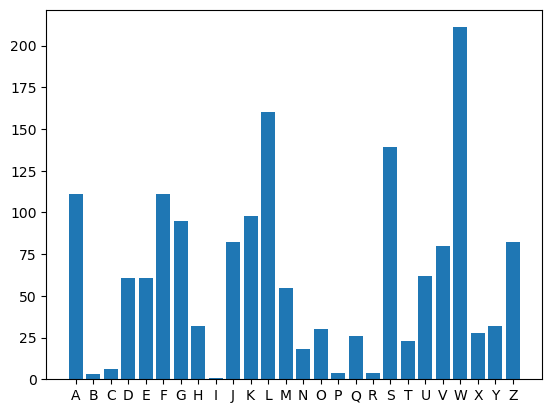

In [30]:
import matplotlib.pyplot as plt

freq = []
letters = []
for l in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
    letters.append(l)
    freq.append(ciphertext.count(l))

plt.bar(letters, freq)
plt

<!-- END QUESTION -->

## Question 2.2

In the code cell below, write a block of code that:
1. uses every possible key for the Caesar cipher to decrypt the text,
2. score each decryption using the chi squared method, and
3. store each score to a list named `chi_squared_scores`, in order. 

For example, the first element in the `chi_squared_scores` list, `chi_squared_scores[0]`, should contain the chi squared score for the decryption obtained using a key of 0, `chi_squared_scores[1]` should contain the score when using a key of 1, and so on.

In [32]:
chi_squared_scores = []

for a in range(26):
    score = chi_squared(caesar(ciphertext, a, decrypt=True))
    chi_squared_scores.append(score)

print(chi_squared_scores)

[11476.590345085184, 19194.790248161713, 26776.93893824448, 7555.609978060503, 7210.027577454071, 9512.841641578107, 41588.095843974486, 11282.393461857633, 8835.502701151869, 17075.720747480365, 16993.6686960993, 11404.966678573339, 30449.689434604363, 27968.720140888112, 14299.139884913075, 12329.6201604869, 12677.56157164436, 8745.776384924411, 51.98933552181273, 21744.383028641234, 10381.123881599695, 31757.878006865758, 14001.432873838077, 43902.13451074849, 6246.252738235334, 20790.189751111415]


In [33]:
grader.check("q2_2")

q2_2 results: All test cases passed!
q2_2 - 1 message: chi_squared_scores has 26 elements
q2_2 - 2 message: The first element of chi_squared_scores is correct

### Question 2.3

Based on the list of chi squared scores you computed in the previous question, determine which key was most likely used to encrypt the message. Assign the value of the key to the variable `likely_key` in the code cell below.

In [38]:
likely_key = chi_squared_scores.index(min(chi_squared_scores))

In [39]:
grader.check("q2_3")

q2_3 results: All test cases passed!
q2_3 - 1 message: likely_key has been assigned to an integer value

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

In [ ]:
grader.export(pdf=False, force_save=True)

<IPython.core.display.Javascript object>